<a href="https://colab.research.google.com/github/brahimje/DLProjects/blob/master/Introduction/Imroving_Computer_Vision_Using_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Improving Computer Vision Accuracy using Convolutions**

In [4]:
import tensorflow as tf

#Load data
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

#Normalize pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [5]:
#Define models
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model
print(f'\nTraining the model:')
model.fit(training_images, training_labels, epochs=5)

#Evalute on the test
print(f'\nEvalute on test set')
test_loss = model.evaluate(test_images, test_labels)


Training the model:
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4927 - accuracy: 0.8270
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3701 - accuracy: 0.8668
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3332 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3084 - accuracy: 0.8864
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2926 - accuracy: 0.8921

Evalute on test set
313/313 [==============================] - 1s 2ms/step - loss: 0.3662 - accuracy: 0.8642


ultimate concept of `Convolutional` is that they narrow down the content of the image to focus on specific parts and this will likely improve the model accuracy. 

If you've ever done image processing using a filter, then convolutions will look very familiar. In short, you take an array (usually 3x3 or 5x5) and scan it over the entire image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 matrix that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision because it often highlights features that distinguish one item from another. Moreover, **the amount of information needed is then much less because you'll just train on the highlighted features**.

That's the **concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers**, and then the information going to the dense layers is more focused and possibly more accurate.

Run the code below. This is the same neural network as earlier, but this time with `Convolution` and `MaxPooling` layers added first. It will take longer, but look at the impact on the accuracy.

In [19]:
#Define a callback

class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    #Test if accuracy > 90%
    if(logs.get('accuracy') > 0.9):
      # Stop if threshold is met
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

# Instantiate class
mycallback = MyCallback()

#Define model
model = tf.keras.Sequential([
    
    #Add Convelotional and and max pooling layers
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Print model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5, callbacks=[mycallback])

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 800)               0         
                                                                 
 dense_15 (Dense)            (None, 128)              

It's likely gone up to about 92% on the training data and 90% on the validation data. That's significant, and a step in the right direction!

I added a Conv2D layer. The parameters are:

    * The number of convolutions I want to generate.
    * The value here is purely arbitrary but it's good to use powers of 2 starting from 32.
    * The size of the Convolution. In this case, a 3x3 grid.
    * The activation function to use. In this case, I used a ReLU, which you might recall is the equivalent of returning x when x>0, else return 0.
    * In the first layer, the shape of the input data.

Follow the convolution with a `MaxPool2D` **layer which is designed to compress the image, while maintaining the content of the features that were highlighted by the convlution.** By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, **the idea is that it creates a 2x2 array of pixels, and picks the biggest one.** Thus, it turns 4 pixels into 1. It repeats this across the image, and in doing so, it halves both the number of horizontal and vertical pixels, effectively **reducing the image to 25% of the original image**.

You can call `model.summary()` to see the size and shape of the network, and you'll notice that after every max pooling layer, the image size is reduced in this way. 


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```



Then you added another convolution and flattened the output.

```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
  tf.keras.layers.Flatten(),
  
```


After this, you'll just have the same DNN structure as the non convolutional version. The same 128 dense layers, and 10 output layers as in the pre-convolution example:

```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


## About overfitting

Try running the training for more epochs -- say about 20, and explore the results. But while the results might seem really good, the validation results may actually go down, due to something called `overfitting`. In a nutshell, overfitting **occurs when the network learns the data from the training set really well**, but it's too specialised to only that data, and as a result is less effective at interpreting other unseen data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it. But blue suede shoes might confuse you...

# Visualizing the Convolutions and Pooling

Let's explore how to show the convolutions graphically. The cell below prints the first 100 labels in the test set, and you can see that the ones at index `0`, index `23` and index `28` are all the same value (i.e. `9`). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [8]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


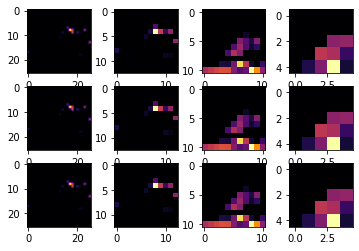

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1


layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

